# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install minisom

In [3]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [5]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.75)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 200)

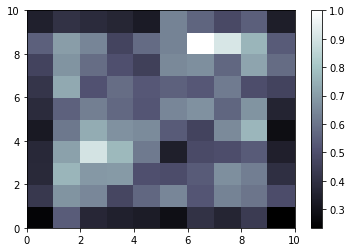

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

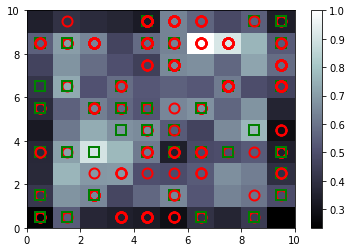

In [7]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,5)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15715750.0
15621546.0
15789201.0
15704081.0
15723884.0
15677112.0
15636478.0
15689781.0
15735837.0
15627699.0
15778290.0
15585192.0
15591552.0
15701081.0
15622729.0
15671582.0
15611318.0
15722479.0
15730360.0
15751137.0
15664083.0
15690898.0
15704315.0
15766663.0
15622507.0
15640521.0
15591248.0
15800049.0
15785367.0
15659031.0
15801817.0
15571571.0
15796787.0
15725002.0
15707681.0
15632669.0
15598586.0
15701738.0
15690169.0
15668679.0
15738487.0
15773421.0
15682686.0
15636521.0
15707602.0
15815095.0
15720725.0
15672912.0
15598614.0
15631267.0
15611189.0
15759387.0
15712483.0
15572361.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


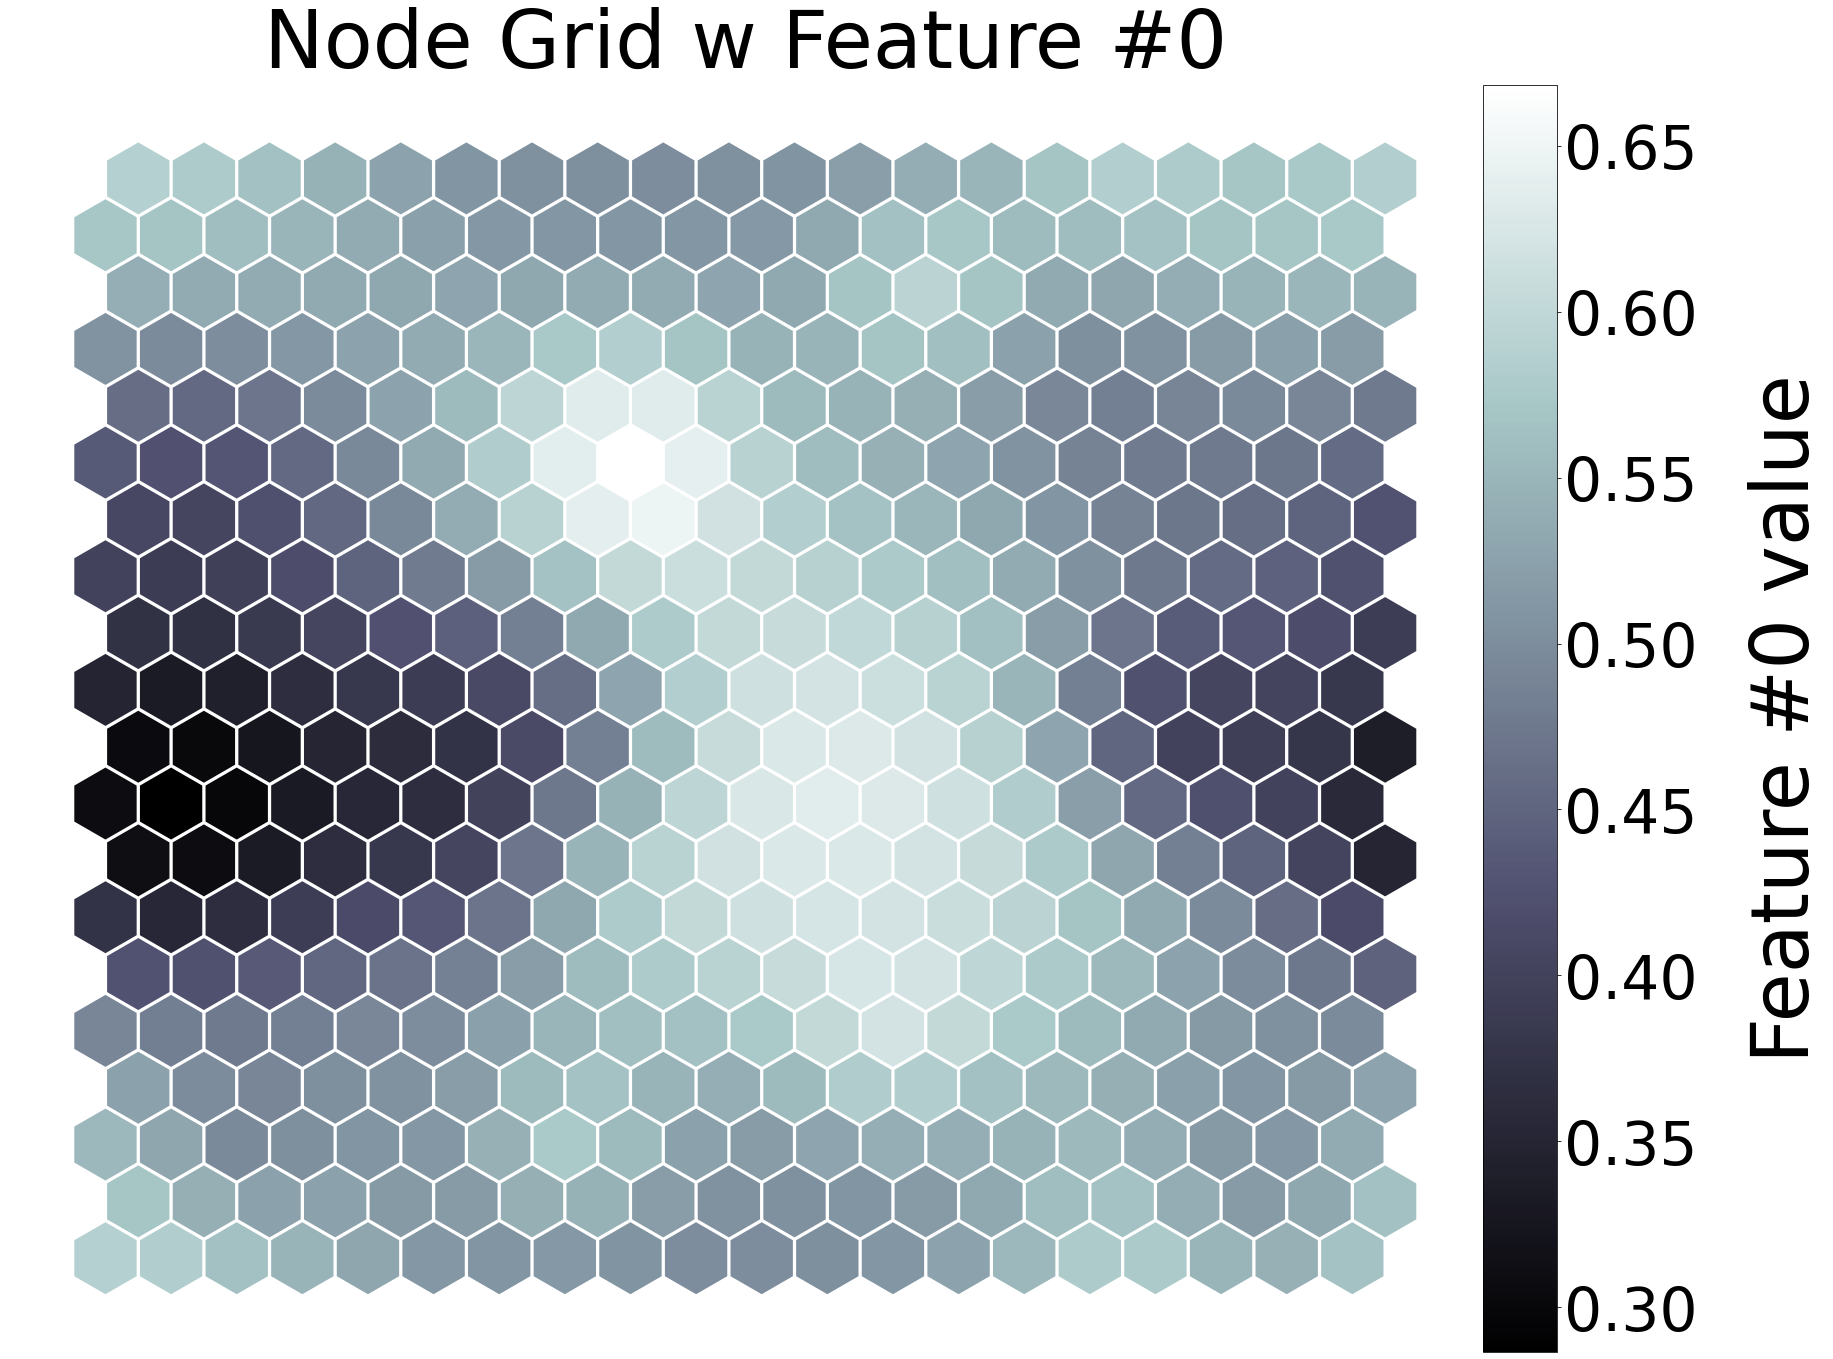

In [9]:
! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.5, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

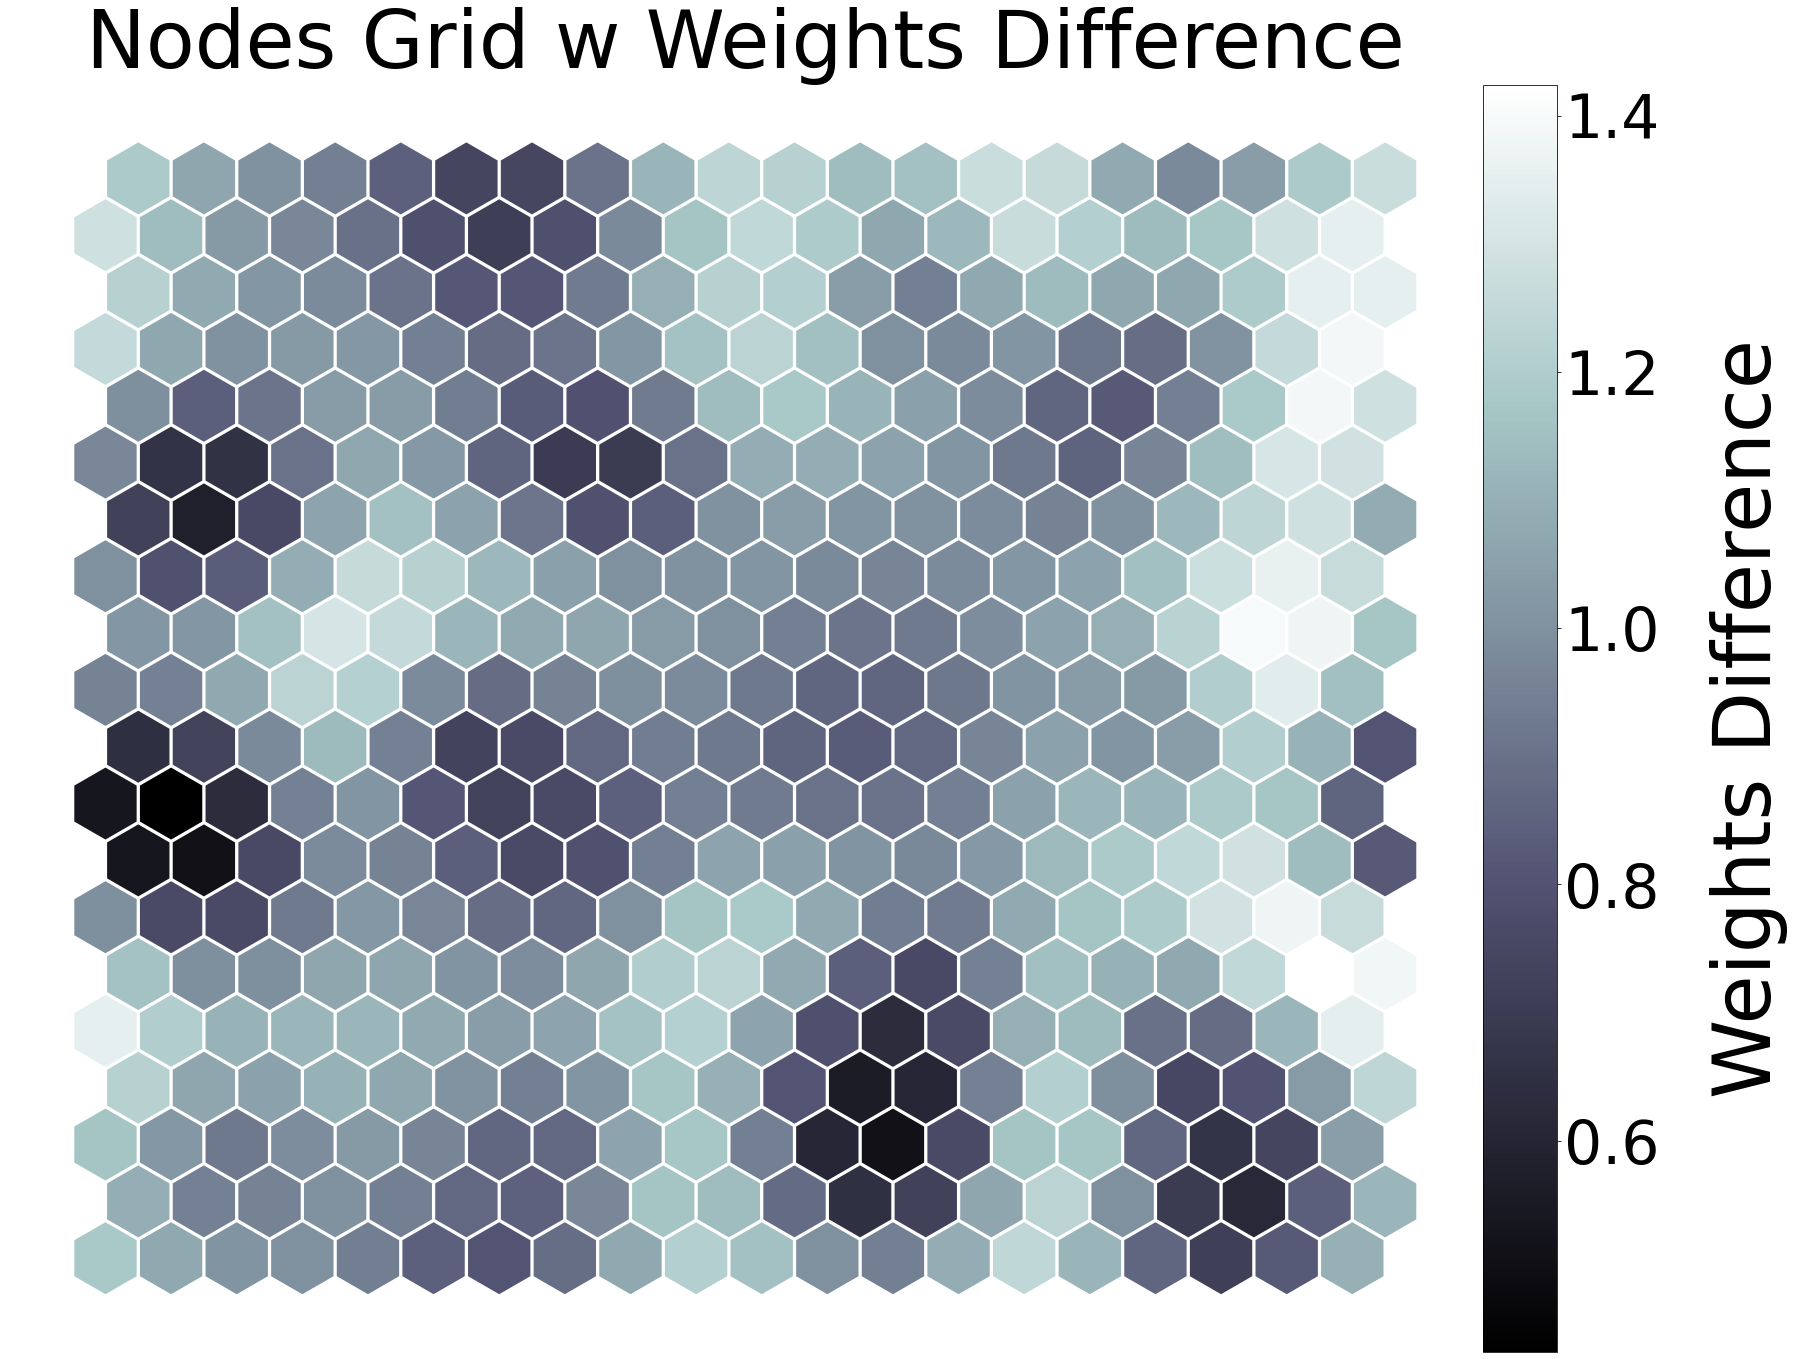

In [10]:
net.diff_graph()

In [11]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[12, 3.4641016151377553],
 [17, 13.856406460551021],
 [12.5, 14.722431864335457],
 [8, 12.124355652982143],
 [0, 6.9282032302755105],
 [1.5, 11.258330249197702],
 [16, 0.0],
 [1.5, 11.258330249197702],
 [15.5, 2.598076211353316],
 [6.5, 11.258330249197702],
 [5.5, 7.794228634059948],
 [5.5, 7.794228634059948],
 [6, 6.9282032302755105],
 [6.5, 7.794228634059948],
 [12.5, 4.330127018922194],
 [16, 0.0],
 [7, 6.9282032302755105],
 [19.5, 11.258330249197702],
 [15.5, 0.8660254037844388],
 [0, 12.124355652982143],
 [16, 13.856406460551021],
 [7, 15.588457268119896],
 [16, 0.0],
 [1, 1.7320508075688776],
 [16.5, 0.8660254037844388],
 [6.5, 7.794228634059948],
 [15.5, 0.8660254037844388],
 [6, 6.9282032302755105],
 [19.5, 11.258330249197702],
 [6.5, 6.062177826491071],
 [7, 6.9282032302755105],
 [10, 15.588457268119896],
 [6, 1.7320508075688776],
 [5.5, 7.794228634059948],
 [11, 6.9282032302755105],
 [16, 8.660254037844387],
 [7, 1.7320508075688776],
 [6, 6.9282032302755105],
 [8, 12.1243556

<Figure size 432x288 with 0 Axes>

In [12]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh')	

[[0,
  1,
  2,
  6,
  8,
  14,
  15,
  18,
  20,
  22,
  24,
  26,
  41,
  46,
  47,
  48,
  50,
  51,
  52,
  53,
  57,
  60,
  63,
  72,
  75,
  76,
  77,
  83,
  84,
  85,
  86,
  88,
  89,
  90,
  91,
  92,
  94,
  95,
  96,
  97,
  100,
  107,
  109,
  110,
  111,
  114,
  121,
  127,
  131,
  132,
  133,
  135,
  142,
  147,
  150,
  152,
  155,
  156,
  157,
  159,
  160,
  161,
  165,
  166,
  167,
  168,
  176,
  177,
  180,
  185,
  187,
  190,
  193,
  206,
  209,
  212,
  214,
  216,
  217,
  218,
  221,
  226,
  236,
  237,
  238,
  244,
  249,
  250,
  251,
  253,
  256,
  258,
  259,
  262,
  268,
  269,
  270,
  272,
  275,
  280,
  281,
  283,
  284,
  295,
  301,
  302,
  303,
  306,
  310,
  315,
  318,
  326,
  327,
  328,
  329,
  334,
  335,
  340,
  344,
  349,
  351,
  354,
  364,
  365,
  366,
  371,
  372,
  374,
  377,
  381,
  382,
  383,
  386,
  391,
  394,
  395,
  399,
  400,
  404,
  407,
  409,
  410,
  415,
  421,
  422,
  424,
  431,
  439,
  441,
  

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

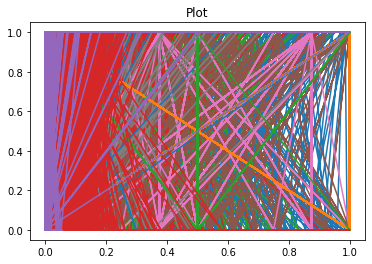

In [14]:
## Plot 'sem sentido' para observar como ele se comporta no matplotlib

plt.plot(X, y)
plt.title('Plot')
plt.show()

## Adicionando mais parâmentros para visualização gráfica

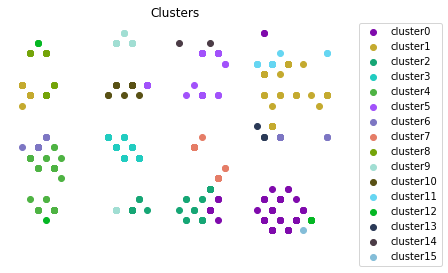

<Figure size 432x288 with 0 Axes>

In [15]:
a = net.cluster(X, type='qthresh', show= True, cutoff=3, numcl=8, printout=False)

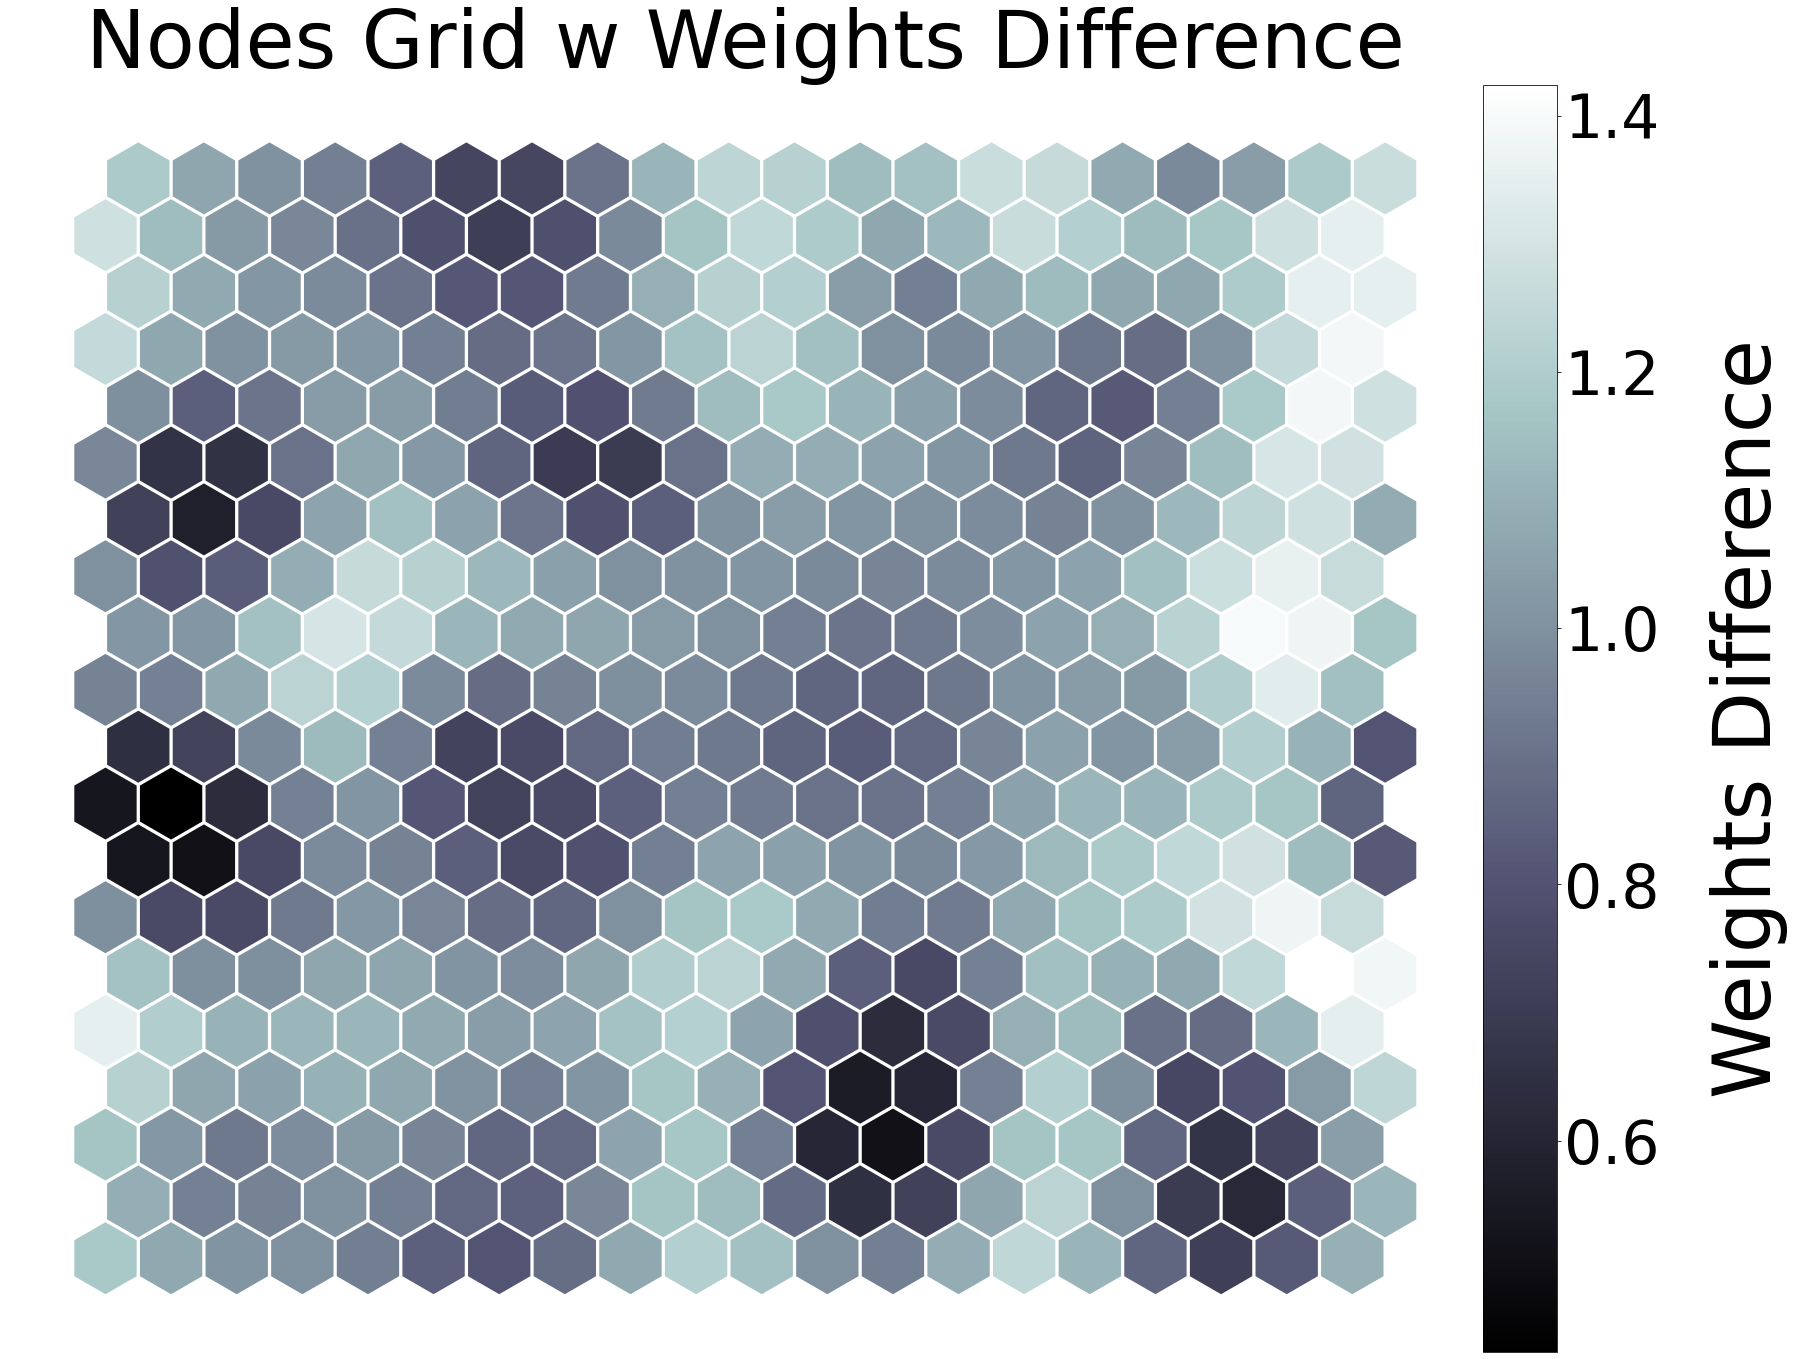

In [16]:
## Testando o DIFF_GRAPH novamente, com mais parâmetros.

z = net.diff_graph(show=True, printout=False, returns=True)